In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from dtreeviz.trees import dtreeviz 
import seaborn as sns

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [3]:
df = pd.read_csv('longitudinal_bl3y_final.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,participant_id,participant_number,redcap_event_name,age,gender,height_m,weight_kg_baseline,weight_kg_3yr,bmi_baseline,bmi_3yr,kl_score,kl_score_contra,shoamri_total,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,shoamri_car_score,mhi5_score_baseline,mhi5_score_3yr,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_womac_pain,hoos_womac_stiffness,hoos_womac_function,hoos_pain_score_baseline,hoos_pain_score_3yr,char_rise_baseline,m_walk_test_baseline,stair_climbing_baseline,side_plank_baseline,st_hip_side_baseline,char_rise_3yr,m_walk_test_3yr,stair_climbing_3yr,side_plank_3yr,st_hip_side_3yr,t1rho_mean_fem_whole_cartilage_baseline,t2_mean_fem_whole_cartilage_baseline,t1rho_mean_ace_whole_cartilage_baseline,t2_mean_ace_whole_cartilage_baseline,t1rho_mean_fem_whole_cartilage_3yr,t2_mean_fem_whole_cartilage_3yr,t1rho_mean_ace_whole_cartilage_3yr,t2_mean_ace_whole_cartilage_3yr,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm_baseline,st_hip_ext_norm_baseline,st_hip_abd_norm_baseline,st_hip_add_norm_baseline,st_hip_flex_norm_3yr,st_hip_ext_norm_3yr,st_hip_abd_norm_3yr,st_hip_add_norm_3yr,ipaq_vigorous_met,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
0,P001L,1,baseline_arm_1,65,1,1.80,97.3,97.40,30.03,30.40,2,3,15,1,1,5,1,7,80,56,100,100.0,100.0,100.00,100,100.0,100.0,100.0,77.5,12,20.89,10.77,14.27,1,16,20.71,10.45,11.54,1,39.493545,36.250000,45.899765,31.185062,38.498367,40.279898,45.451602,42.702547,37.171642,44.196532,37.442348,40.568306,37.929268,36.808081,36.007463,40.698758,37.521459,36.840659,30.441463,37.909091,50.798319,53.857605,45.309417,41.805344,38.597826,39.825000,31.045317,29.757919,30.534884,30.734043,0.26,0.41,0.24,0.51,0.27,0.60,0.16,0.47,0,0,0,148.5,1
1,P001R,1,baseline_arm_1,65,1,1.80,97.3,97.40,30.03,30.40,3,2,16,0,1,12,0,3,80,56,100,100.0,100.0,100.00,100,100.0,100.0,100.0,80.0,12,20.89,10.77,8.99,2,16,20.71,10.45,8.63,2,37.203218,31.179208,40.687780,35.657792,38.437376,33.114392,44.508866,37.866123,38.609929,45.260116,34.735294,35.735883,36.031707,32.101010,34.780142,38.620290,31.699580,28.598182,27.619512,26.757576,46.525000,50.877778,39.918977,35.337945,36.141304,35.741071,40.038168,33.424837,34.630832,39.919540,0.18,0.47,0.14,0.47,0.15,0.51,0.08,0.39,0,0,0,148.5,1
2,P002L,2,baseline_arm_1,60,2,1.75,62.6,62.03,20.44,20.97,1,1,10,0,0,8,0,2,92,84,100,100.0,100.0,100.00,100,100.0,100.0,100.0,100.0,19,14.51,9.29,72.00,1,25,15.72,8.43,74.81,1,36.894112,36.274728,39.063521,36.883323,36.737011,39.808437,37.536424,36.280691,34.865248,40.182081,32.983229,41.480874,34.119512,32.747475,32.845070,39.624277,36.163522,38.222222,32.787805,33.181818,39.563910,37.989247,39.185328,40.369686,34.776596,35.571429,35.745308,38.023483,36.856075,37.648352,0.36,0.88,0.24,0.43,0.42,0.94,0.36,0.66,2880,600,0,594.0,2
3,P002R,2,baseline_arm_1,60,2,1.75,62.6,62.03,20.44,20.97,1,1,13,0,0,11,1,1,92,84,100,100.0,100.0,100.00,100,100.0,100.0,100.0,100.0,19,14.51,9.29,88.00,2,25,15.72,8.43,72.37,2,34.964481,26.479733,33.947857,28.195027,30.908057,27.011128,34.446011,30.539640,39.290780,42.008671,32.142558,32.434545,34.054863,35.424242,28.415493,33.419075,26.398323,26.049091,21.692683,21.888889,27.540741,35.375328,34.737643,32.840149,39.691489,27.044444,30.321053,27.522901,27.192237,30.829787,0.34,0.76,0.27,0.35,0.44,0.90,0.37,0.59,2880,600,0,594.0,2
4,P006L,6,baseline_arm_1,56,1,1.65,59.1,63.70,21.71,23.40,3,3,5,0,0,4,0,1,72,92,100,100.0,100.0,93.75,95,100.0,100.0,95.0,97.5,27,15.87,8.31,151.00,1,30,16.71,8.29,128.93,1,33.630381,32.819486,33.240301,30.177376,36.679127,38.343637,38.148536,38.226135,35.780142,40.251445,32.758403,33.798182,30.373171,24.818182,31.4718

In [5]:
list(df.columns)

['participant_id',
 'participant_number',
 'redcap_event_name',
 'age',
 'gender',
 'height_m',
 'weight_kg_baseline',
 'weight_kg_3yr',
 'bmi_baseline',
 'bmi_3yr',
 'kl_score',
 'kl_score_contra',
 'shoamri_total',
 'shoamri_bme_score',
 'shoamri_sc_score',
 'shoamri_lab_score',
 'shoamri_mis_score',
 'shoamri_car_score',
 'mhi5_score_baseline',
 'mhi5_score_3yr',
 'hoos_symptoms_score',
 'hoos_adl_score',
 'hoos_sports_score',
 'hoos_qol_score',
 'hoos_womac_pain',
 'hoos_womac_stiffness',
 'hoos_womac_function',
 'hoos_pain_score_baseline',
 'hoos_pain_score_3yr',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'st_hip_side_baseline',
 'char_rise_3yr',
 'm_walk_test_3yr',
 'stair_climbing_3yr',
 'side_plank_3yr',
 'st_hip_side_3yr',
 't1rho_mean_fem_whole_cartilage_baseline',
 't2_mean_fem_whole_cartilage_baseline',
 't1rho_mean_ace_whole_cartilage_baseline',
 't2_mean_ace_whole_cartilage_baseline',
 't1rho_mean_fem_whole_cartila

In [ ]:
df.isna().sum()

In [15]:
#df.dropna(inplace=True)
#to get rid of some columns w/ NA df = df.dropna(subset=['colA', 'colC']) 
df.describe()

,participant_number,age,gender,height_m,weight_kg_baseline,weight_kg_3yr,bmi_baseline,bmi_3yr,kl_score,kl_score_contra,shoamri_total,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,shoamri_car_score,mhi5_score_baseline,mhi5_score_3yr,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_womac_pain,hoos_womac_stiffness,hoos_womac_function,hoos_pain_score_baseline,hoos_pain_score_3yr,char_rise_baseline,m_walk_test_baseline,stair_climbing_baseline,side_plank_baseline,st_hip_side_baseline,char_rise_3yr,m_walk_test_3yr,stair_climbing_3yr,side_plank_3yr,st_hip_side_3yr,t1rho_mean_fem_whole_cartilage_baseline,t2_mean_fem_whole_cartilage_baseline,t1rho_mean_ace_whole_cartilage_baseline,t2_mean_ace_whole_cartilage_baseline,t1rho_mean_fem_whole_cartilage_3yr,t2_mean_fem_whole_cartilage_3yr,t1rho_mean_ace_whole_cartilage_3yr,t2_mean_ace_whole_cartilage_3yr,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm_baseline,st_hip_ext_norm_baseline,st_hip_abd_norm_baseline,st_hip_add_norm_baseline,st_hip_flex_norm_3yr,st_hip_ext_norm_3yr,st_hip_abd_norm_3yr,st_hip_add_norm_3yr,ipaq_vigorous_met,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,46.000000,46.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,34.750000,54.354167,1.583333,1.695000,70.855417,70.820625,24.387083,24.803125,1.437500,1.437500,9.395833,0.375000,0.500000,5.958333,0.333333,2.229167,83.500000,79.000000,92.708333,95.006250,92.838542,90.104167,94.062500,92.187500,94.822500,93.645833,92.708333,20.479167,19.093750,11.488125,73.389583,1.500000,19.250000,20.624604,11.673750,76.642083,1.500000,35.652828,31.769711,35.768483,30.939892,37.047459,35.517010,39.422816,36.031222,39.881029,40.444341,33.609978,35.929035,33.373202,32.054363,33.470418,36.330550,31.676495,32.002158,28.740406,27.850088,33.916379,39.711596,35.004254,34.735040,31.771872,28.406497,32.339687,29.753043,32.178146,28.816975,0.988125,1.772708,0.228542,0.465625,0.924792,0.583750,0.253043,0.431957,1203.00000,538.666667,0.791667,1288.375000,1.520833
std,27.138337,13.011435,0.498224,0.102418,16.974618,17.519530,3.869341,4.232952,1.029486,1.029486,5.538029,0.788886,0.967559,4.186901,0.476393,2.136208,10.093183,15.425869,12.503546,10.856696,13.825325,16.299706,12.057321,14.728257,11.447519,12.767961,11.261322,6.649235,3.567021,5.522784,45.728077,0.505291,6.945073,4.096686,2.920623,63.485750,0.505291,2.497047,4.403198,3.679880,4.908193,6.053167,6.703509,5.529560,5.484951,6.219735,3.232204,2.865918,3.458734,3.543931,5.756554,7.850488,5.626333,4.581378,4.794395,5.521524,6.671944,7.870010,6.241570,4.329952,4.924413,5.635501,7.394630,6.663978,5.467950,5.005993,6.736009,4.643143,7.754218,0.097849,0.131940,3.889964,0.161833,0.140188,0.131515,1285.12233,508.241078,0.770696,968.191803,0.504852
min,1.000000,27.000000,1.000000,1.470000,47.000000,47.400000,20.400000,19.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

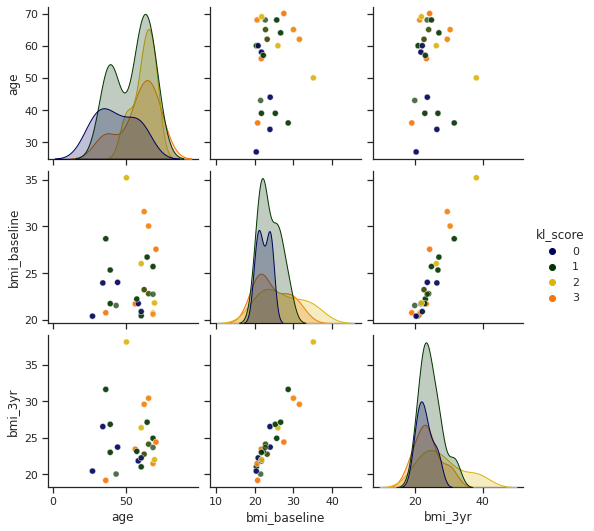

In [6]:
#DEMOGRAPHICS}
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'bmi_3yr', 'kl_score' ]]

palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', palette = palette, diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

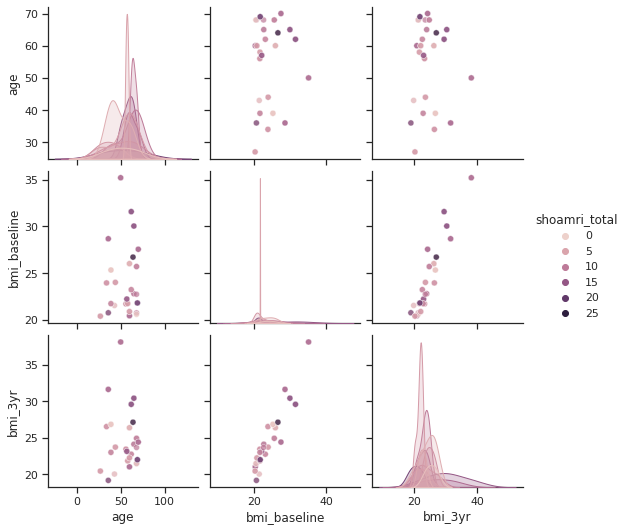

In [26]:
#DEMOGRAPHICS SHOAMRI
# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'bmi_3yr', 'shoamri_total' ]]

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'shoamri_total', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 


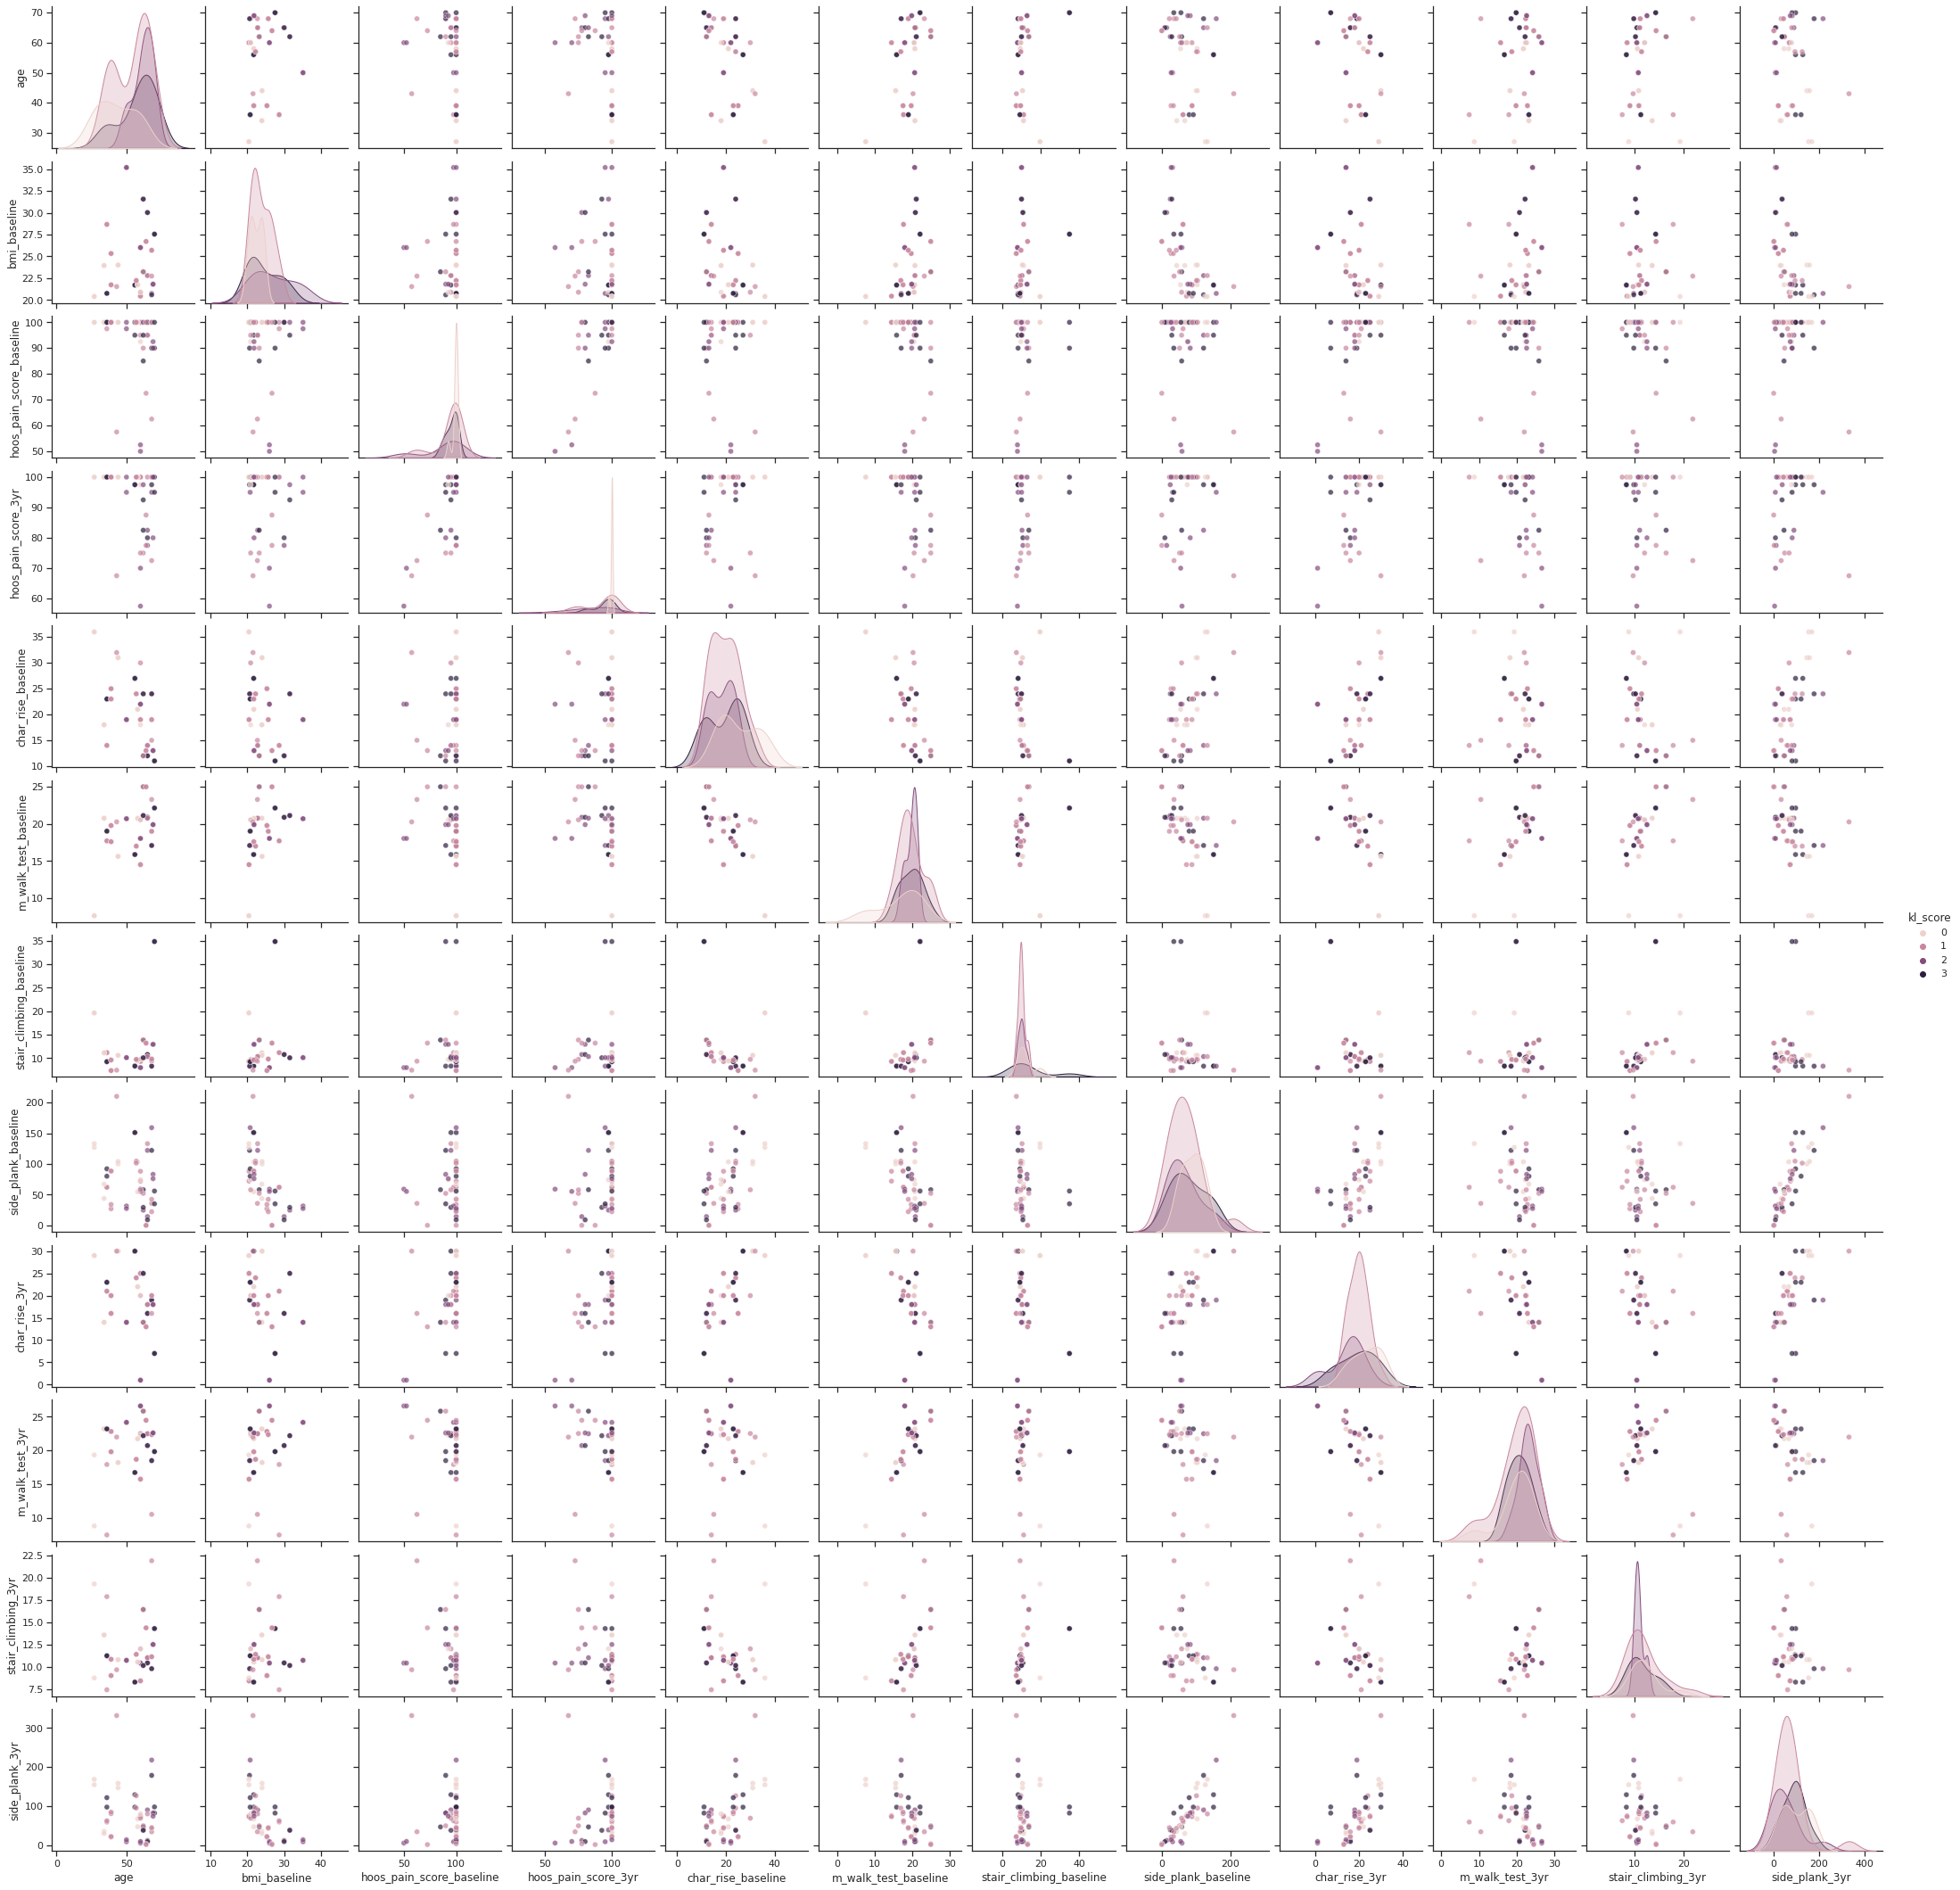

In [8]:
#HOOS, functional tests, cartilage scores 
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'char_rise_3yr',
 'm_walk_test_3yr',
 'stair_climbing_3yr',
 'side_plank_3yr',
'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

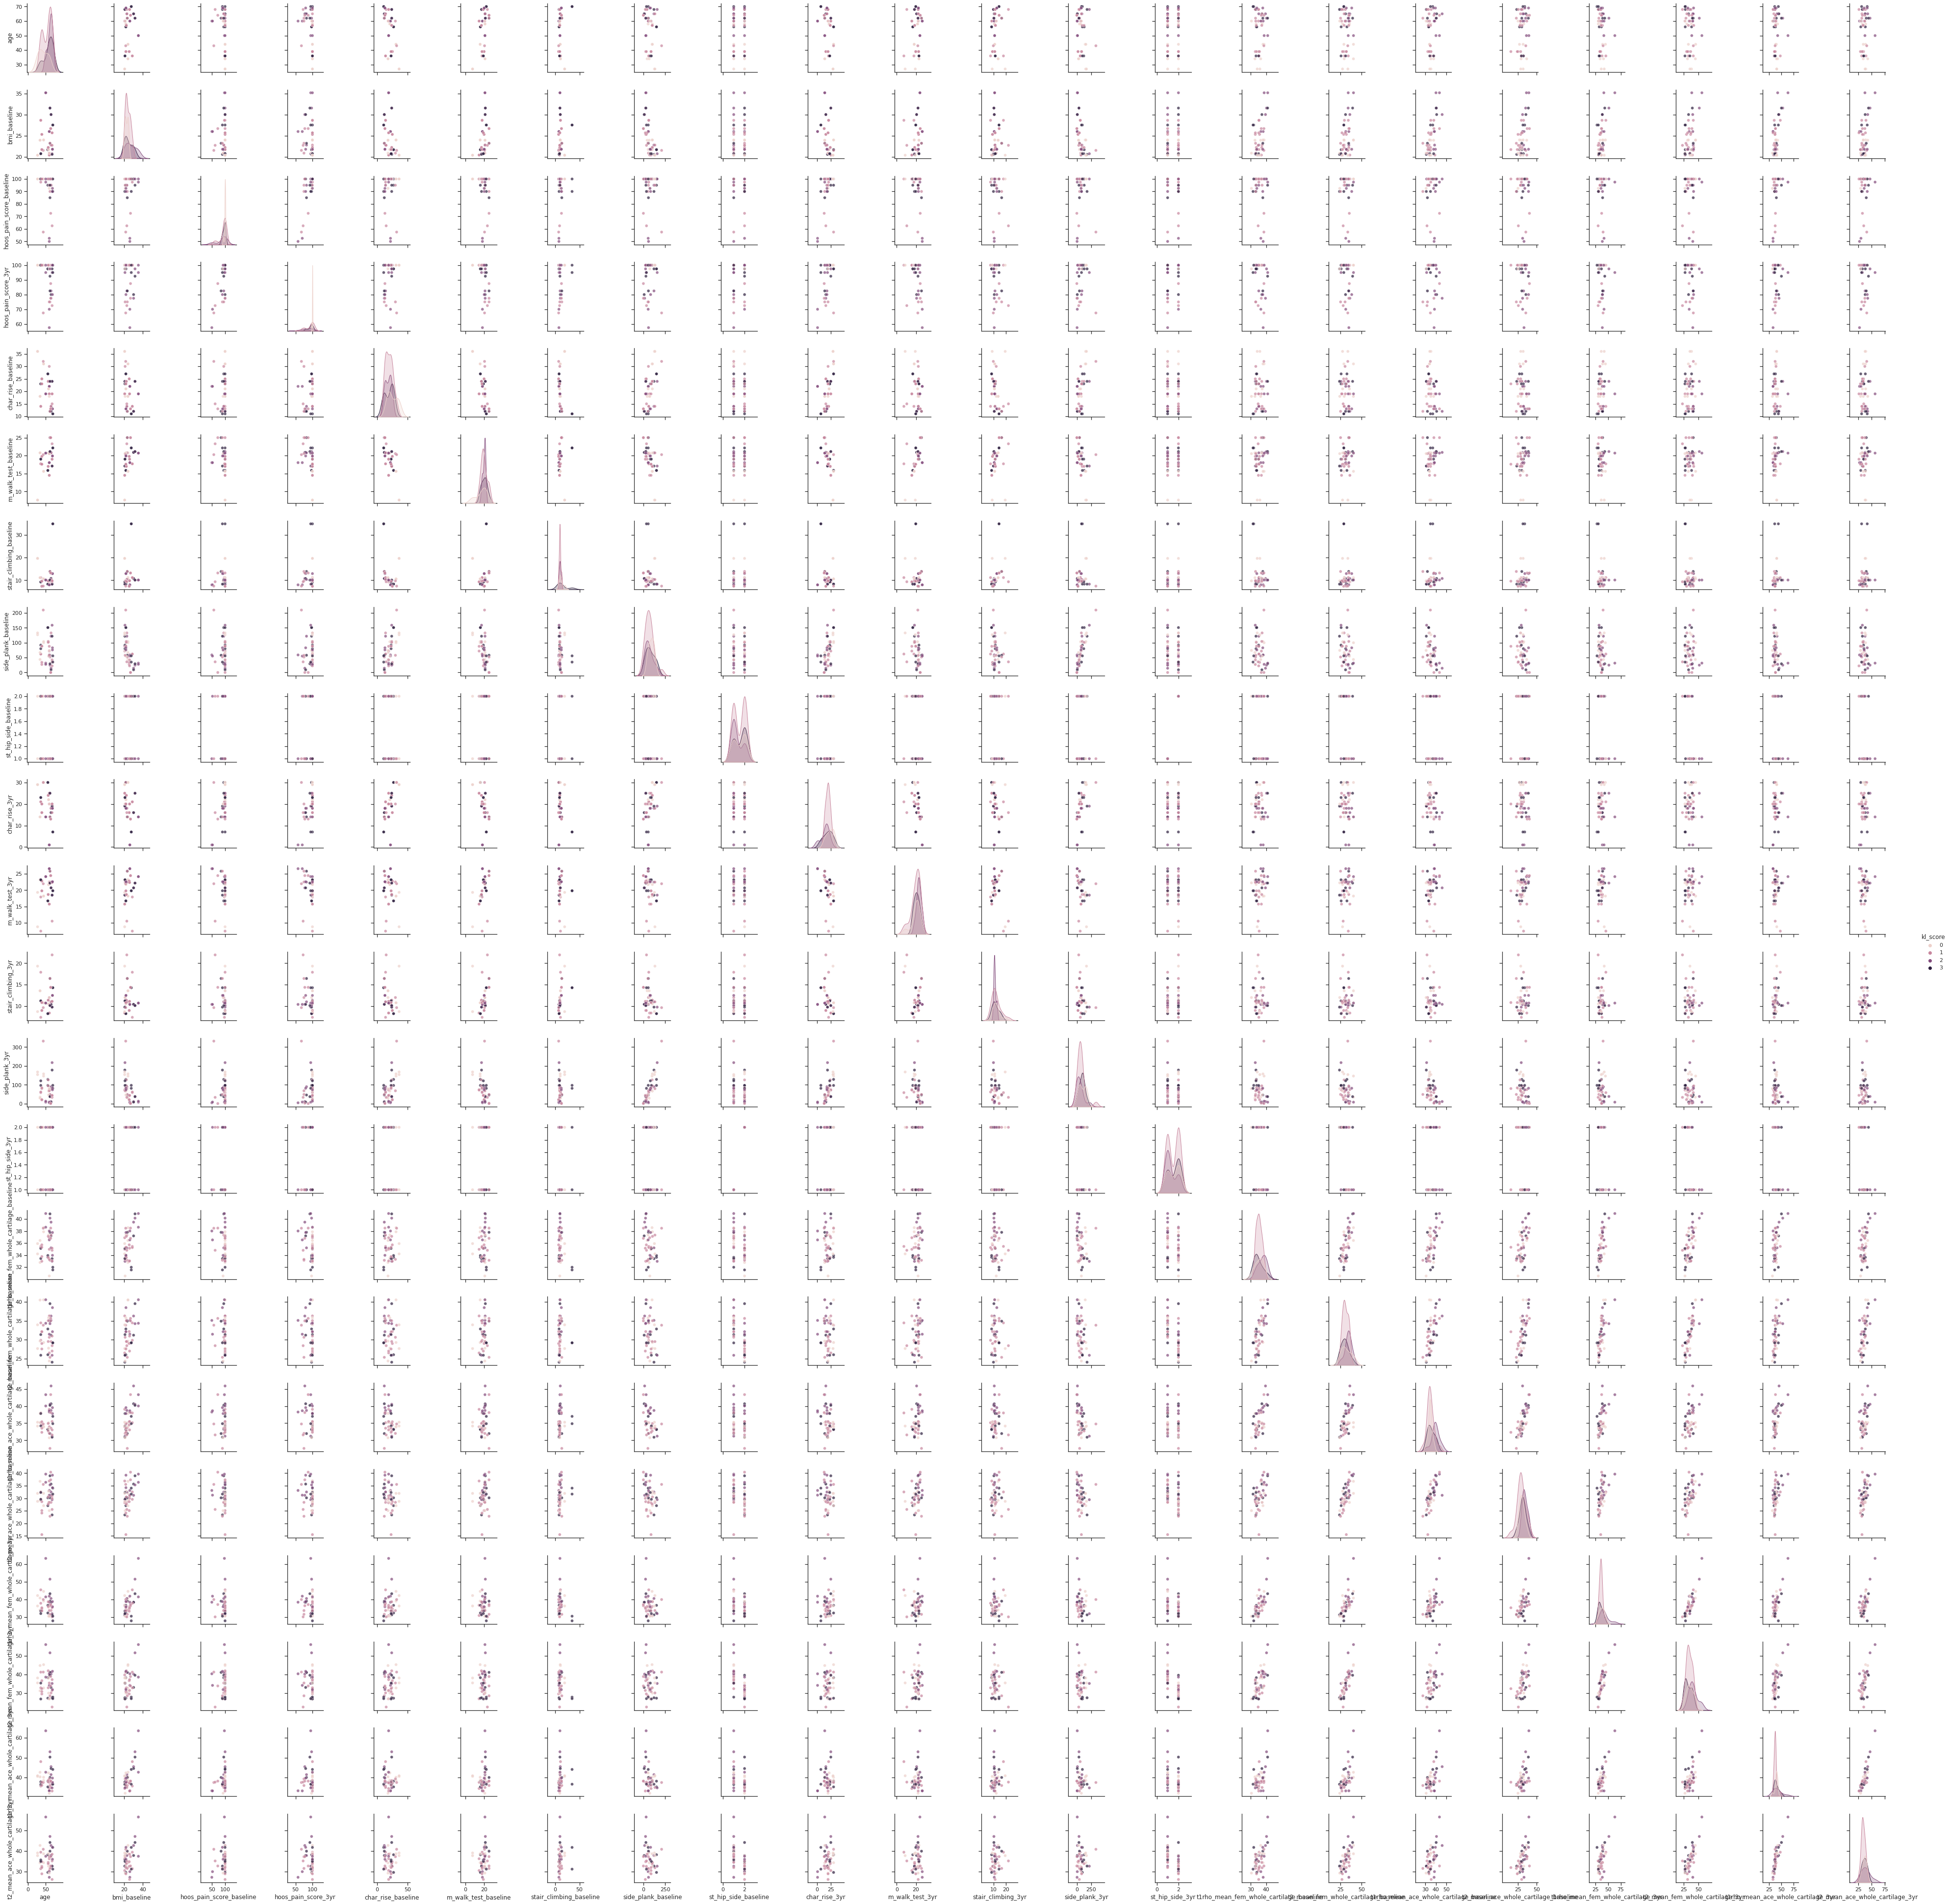

In [28]:
#HOOS, functional tests, cartilage scores 
# Use seaborn for pair plots
sns.set(style="ticks", color_codes=True);

# Will only use six variables for plotting pairs
reduced_features = df[['age', 'bmi_baseline', 'hoos_pain_score_baseline', 'hoos_pain_score_3yr',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'st_hip_side_baseline',
 'char_rise_3yr',
 'm_walk_test_3yr',
 'stair_climbing_3yr',
 'side_plank_3yr',
 'st_hip_side_3yr',
 't1rho_mean_fem_whole_cartilage_baseline',
 't2_mean_fem_whole_cartilage_baseline',
 't1rho_mean_ace_whole_cartilage_baseline',
 't2_mean_ace_whole_cartilage_baseline',
 't1rho_mean_fem_whole_cartilage_3yr',
 't2_mean_fem_whole_cartilage_3yr',
 't1rho_mean_ace_whole_cartilage_3yr',
 't2_mean_ace_whole_cartilage_3yr', 'kl_score']]
                       

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features,hue = 'kl_score', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

In [106]:

y = df['hoos_pain_score']

In [77]:
#multioutput
y = df[['hoos_pain_score', 't1rho_mean_fem_whole_cartilage',
 't2_mean_fem_whole_cartilage', 't1rho_mean_ace_whole_cartilage',
 't2_mean_ace_whole_cartilage']]

In [107]:
df.drop(['participant_id','hoos_pain_score', 'hoos_symptoms_score','hoos_adl_score',
         'hoos_sports_score','hoos_qol_score','hoos_womac_pain','hoos_womac_stiffness','hoos_womac_function',
         't1rho_mean_fem_whole_cartilage',
 't2_mean_fem_whole_cartilage',
 't1rho_mean_ace_whole_cartilage',
 't2_mean_ace_whole_cartilage',
 't1rho_mean_fem_whole_cartilage_baseline',
 't2_mean_fem_whole_cartilage_baseline',
 't1rho_mean_ace_whole_cartilage_baseline',
 't2_mean_ace_whole_cartilage_baseline','race___1'], axis=1, inplace=True)


In [108]:
list(df.columns)

['age',
 'gender',
 'height_m',
 'weight_kg',
 'bmi',
 'mhi5_score',
 'mhi5_score_baseline',
 'hoos_pain_score_baseline_arm_1',
 'hoos_pain_score_1_yr_follow_up_arm_1',
 'hoos_pain_score_2_yr_follow_up_arm_1',
 'char_rise',
 'm_walk_test',
 'stair_climbing',
 'side_plank',
 'char_rise_baseline',
 'm_walk_test_baseline',
 'stair_climbing_baseline',
 'side_plank_baseline',
 'char_rise_1yr',
 'm_walk_test_1yr',
 'stair_climbing_1yr',
 'side_plank_1yr',
 'char_rise_2yr',
 'm_walk_test_2yr',
 'stair_climbing_2yr',
 'side_plank_2yr']

In [109]:
#run rf classifier base model on full dataset
clf = ExtraTreesRegressor(n_estimators=1000, max_depth=None,
    min_samples_split=2, random_state=0, max_features = "auto")
clf.fit(df, y)

ExtraTreesRegressor(n_estimators=1000, random_state=0)

In [110]:
#examine feature importance
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': clf.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
9,hoos_pain_score_2_yr_follow_up_arm_1,0.497702
8,hoos_pain_score_1_yr_follow_up_arm_1,0.174639
10,char_rise,0.047432
11,m_walk_test,0.041390
7,hoos_pain_score_baseline_arm_1,0.040185
21,side_plank_1yr,0.036155
25,side_plank_2yr,0.035833
13,side_plank,0.028543
17,side_plank_baseline,0.025723
5,mhi5_score,0.022495


In [111]:
# Split up training and testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df, y, 
                                                                            test_size = 0.4, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16, 26)
Training Labels Shape: (16,)
Testing Features Shape: (12, 26)
Testing Labels Shape: (12,)


In [112]:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [113]:
#Create a random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [114]:
rf = ExtraTreesRegressor() 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, n_jobs=-1,
                              return_train_score=True)


rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [115]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [116]:
#evaluate accuracy of base model using .score 
base_model = ExtraTreesRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_model.score(test_features, test_labels) #r squared

0.545886736214605

In [117]:
# Make predictions on test data using the model trained on original data
predictions = base_model.predict(test_features)
errors = abs(predictions - test_labels)
# Performance metrics

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 4.56 points.
Accuracy: 94.38 %.


In [118]:
#evaluate accuracy of model using evaluate function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [119]:
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 4.5625 degrees.
Accuracy = 94.38%.


In [120]:
#evaluation accuracy of best model from random grid search
best_random = rf_random.best_estimator_
best_random.score(test_features, test_labels) #r squared

0.6185378408400968

In [121]:
# Make predictions on test data using the model trained on original data
predictions = best_random.predict(test_features)
errors = abs(predictions - test_labels)
# Performance metrics

print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'points.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 3.76 points.
Accuracy: 95.37 %.


In [122]:
#evaluate accuracy of model using accuracy_score 
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 3.7628 degrees.
Accuracy = 95.37%.


In [123]:
#examine feature importances from best model from random grid search
feature_df = pd.DataFrame({'feature': df.columns,
                          'importance': best_random.feature_importances_})
feature_df.sort_values(by='importance', ascending=False)

,feature,importance
9,hoos_pain_score_2_yr_follow_up_arm_1,0.671352
8,hoos_pain_score_1_yr_follow_up_arm_1,0.212591
7,hoos_pain_score_baseline_arm_1,0.028945
10,char_rise,0.023087
5,mhi5_score,0.020526
25,side_plank_2yr,0.012713
11,m_walk_test,0.007267
17,side_plank_baseline,0.005344
13,side_plank,0.005138
19,m_walk_test_1yr,0.004801


In [ ]:
#https://scikit-learn.org/stable/modules/multiclass.html#multioutput-regression

In [124]:
viz = dtreeviz(best_random.estimators_[0], train_labels, train_features)



AttributeError: 'DataFrame' object has no attribute 'dtype'

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   4.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   3.5s
[CV] END bootstrap=False, max_depth=5